In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [3]:
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(x_features, y_label)

In [4]:
print(lr_clf.coef_)
print(lr_clf.intercept_)

[[0.73455784 0.69539712]]
[-0.13139986]


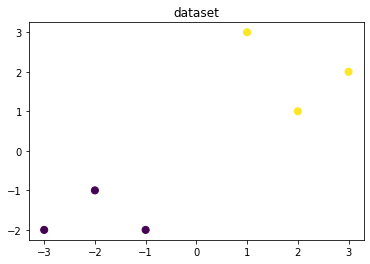

In [5]:
plt.figure()
plt.scatter(x_features[:,0], x_features[:, 1], c=y_label, s=50, cmap='viridis')
plt.title('dataset')
plt.show()

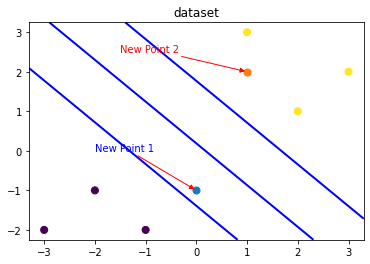

In [35]:
plt.figure()

x_features_new1 = np.array([[0,-1]])
plt.scatter(x_features_new1[:, 0], x_features_new1[:, 1], s=50, cmap='viridis')
plt.annotate(text='New Point 1', xy=(0,-1), xytext=(-2,0), color = 'blue', 
             arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

x_features_new2 = np.array([[1,2]])
plt.scatter(x_features_new2[:,0], x_features_new2[:,1], s=50, cmap='viridis')
plt.annotate(text='New Point 2', xy=(1,2), xytext=(-1.5,2.5), color = 'red', 
             arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

plt.scatter(x_features[:,0], x_features[:,1], c=y_label, s=50, cmap='viridis')
plt.title('dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)

plt.contour(x_grid, y_grid, z_proba, [0.25, 0.5, 0.75], linewidths=2, colors = 'blue')

In [33]:
y_label_new1_predict = lr_clf.predict(x_features_new1)
y_label_new2_predict = lr_clf.predict(x_features_new2)

print(y_label_new1_predict)
print(y_label_new2_predict)

y_label_new1_predict_proba = lr_clf.predict_proba(x_features_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_features_new2)

print(y_label_new1_predict_proba)
print(y_label_new2_predict_proba)

[0]
[1]
[[0.69567724 0.30432276]]
[[0.11983936 0.88016064]]


In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.datasets import load_iris
data = load_iris()
iris_target = data.target
iris_features = pd.DataFrame(data = data.data, columns=data.feature_names)

In [39]:
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [40]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [42]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [44]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
iris_all = iris_features.copy()
iris_all['target'] = iris_target

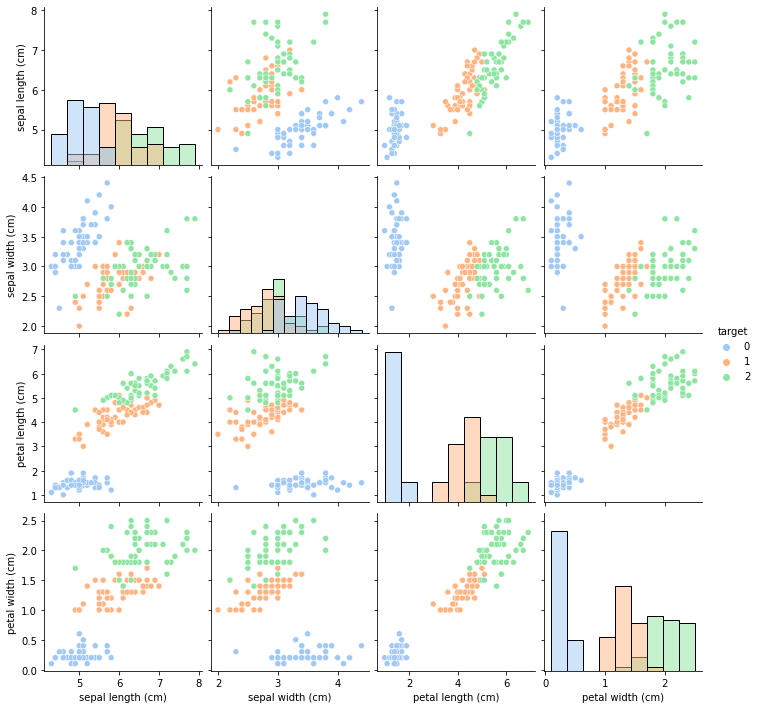

In [51]:
sns.pairplot(data = iris_all, diag_kind='hist', hue='target',palette='pastel')
plt.show()

In [50]:
?sns.pairplot